In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import axes3d
import sklearn.datasets as dt
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
datos = pd.read_csv('D:\emissionsmap\documentation\data\energyco2.csv', sep=',', low_memory=False, encoding='utf-8')

In [4]:
datosN = pd.read_csv('D:\emissionsmap\documentation\TablasNormal\Energyco2_Normalizado.csv', sep=',', low_memory=False, encoding='utf-8')

In [3]:
def detectar_outliers(df:pd.DataFrame,columna:str,name:str,tecnica='cajas') -> pd.DataFrame:

    #Detección por medio de Diagrama de Cajas:
    if tecnica == 'cajas':
        q1 = df[columna].describe().loc['25%']
        q3 = df[columna].describe().loc['75%']
        rango_IC = q3 - q1
        minimo = q1 - ((1.5) * (rango_IC))
        maximo = q3 + ((1.5) * (rango_IC))


    #Detección de outliers por medio de las 3 sigmas:
    elif tecnica == 'sigmas':
        promedio = df[columna].mean()
        stddev = df[columna].std()
        maximo = promedio + (3 * stddev)
        minimo = promedio - (3 * stddev)
    df[name] = 1

    df[name][(df[columna] > maximo) | (df[columna] < minimo)] = 0
    
    return df

In [ ]:
energyco2= detectar_outliers(datosN,'Emisión De Co2','Outlier_CO2_emission')

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


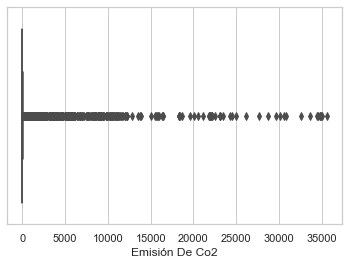

In [12]:
sns.boxplot(energyco2['Emisión De Co2'])
plt.show()

In [10]:
def ploteo_Calidad(df, columna, ubicacion):
    """
    Esta función recibe de parámetros un objeto dataframe y el nombre de la columna por la cuál se va a realizar el gráfico
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    test_per = df.groupby(columna).agg(Porcentage =(columna, lambda p: p.count() / df[columna].count() * 100)).round(2)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=test_per.index, y='Porcentage', data=test_per, ci=None, palette="muted",orient='v', )
    ax.set_title(columna, fontsize=15)
    ax.set_xlabel ("Estado")
    ax.set_ylabel ("Porcentage")
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    #bar.savefig(ubicacion + '\\' + columna + ".png");
    plt.show()

In [ ]:
ploteo_Calidad(datosN, 'Emisión De Co2', '')

In [6]:
datosN.head()

,País,Combustible,Año,Consumo De Energía,Producción De Energía,Pib,Población,Intensidad_Energética_Per_Capita,Intensidad_Energética_Por_Pib,Emisión De Co2,Consumo De Energía TWh,Producción De Energía TWh,Intensidad_Energética_Per_Capita TWh,Intensidad_Energética_Por_Pib TWh,Id_Año,Id_País,Id_Combustible
0,World,all energy types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130,8.584402e-11,8.685147e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,cc8cc099b05d2c44e441a5443da94571
1,World,Coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188,2.305279e-11,2.348013e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,ff8cfc4e6a79e6514be2533a5f5506ad
2,World,natural gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377,1.578699e-11,1.604954e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,400a8f6716375443c853ae0dfd78b768
3,World,Other,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565,3.870575e-11,3.901263e-11,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,6311ae17c1ee52b36e68aaf4ad066387
4,World,Nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000,2.220311e-12,2.220311e-12,1.997243e-11,3.091149e-12,f80bf05527157a8c2a7bb63b22f49aaa,f5a7924e621e84c9280a9a27e1bcb7f6,c49e6d739a7a7356e88aa84503666ee9


In [4]:
datos.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [94]:
data= datos[datos['Energy_type'] != 'all energy types']

In [95]:
data = data[data['Country'] != 'World']

In [96]:
data.sample(3)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
35335,35335,Kyrgyzstan,coal,2005,0.023379,0.005263,15.8198,5075.340,38.704418,12.417229,2.340055
10710,10710,Reunion,all_energy_types,1987,0.018208,0.005460,NaN,578.938,31.451466,0.000000,0.800000
4547,4547,Ethiopia,renewables_n_other,1983,0.006554,0.006554,NaN,38142.700,0.996139,0.000000,0.000000


In [97]:
data.isna().sum()

Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

In [102]:
columnas = data.columns

In [103]:
data

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,13356.5,1.990283,0.000000,NaN
7,7,Afghanistan,coal,1980,0.002479,0.002355,NaN,13356.5,1.990283,0.000000,NaN
8,8,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,13356.5,1.990283,0.000000,NaN
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,13356.5,1.990283,0.000000,NaN
10,10,Afghanistan,nuclear,1980,NaN,NaN,NaN,13356.5,1.990283,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.6204,14654.2,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.6204,14654.2,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.6204,14654.2,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.6204,14654.2,11.508701,4.482962,0.000000


In [98]:
datos = pd.read_csv('D:\emissionsmap\documentation\TablasNormal\Energyco2_Normalizado.csv', sep=',', low_memory=False, encoding='utf-8')

(array([5.1381e+04, 9.4000e+01, 6.9000e+01, 2.2000e+01, 9.0000e+00,
        8.0000e+00, 1.4000e+01, 3.0000e+00, 5.0000e+00, 9.0000e+00]),
 array([-5.13022234e-03,  3.55848873e+03,  7.11698260e+03,  1.06754765e+04,
         1.42339703e+04,  1.77924642e+04,  2.13509580e+04,  2.49094519e+04,
         2.84679458e+04,  3.20264396e+04,  3.55849335e+04]),
 <BarContainer object of 10 artists>)

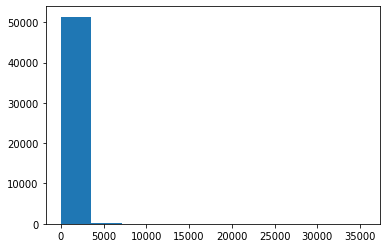

In [101]:
plt.hist(datos['Emisión De Co2'])

(array([25., 20., 10., 20., 20., 20., 20., 20., 20., 25.]),
 array([4298126.5224  , 4639776.976543, 4981427.430686, 5323077.884829,
        5664728.338972, 6006378.793115, 6348029.247258, 6689679.701401,
        7031330.155544, 7372980.609687, 7714631.06383 ]),
 <BarContainer object of 10 artists>)

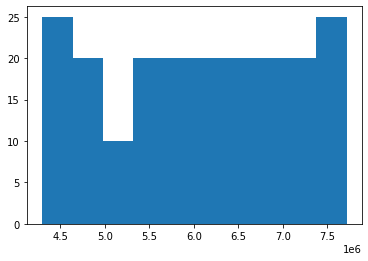

In [58]:
plt.hist(datos['Población'])

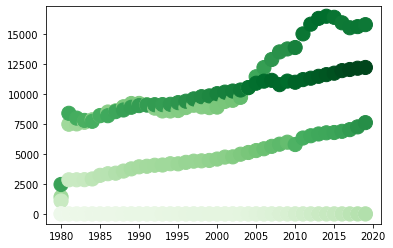

In [60]:
plt.scatter(datos['Año'], datos['Emisión De Co2'], s=200, c=datos['Consumo De Energía'], cmap='Greens')

In [77]:
groups = datos.groupby('Combustible')

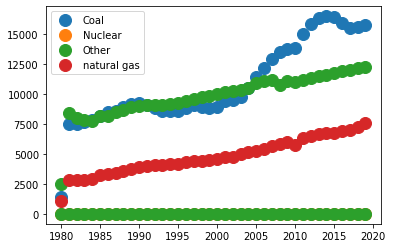

In [78]:

for name, group in groups:
    plt.plot(group['Año'], group['Emisión De Co2'], marker='o', linestyle='', markersize=12, label=name)

plt.legend()

In [17]:
seed = 11
rand_state = 11

In [18]:
rand = np.random.RandomState(seed)

In [19]:
dis_list = ['uniform', 'normal', 'exponential', 'lognormal', 'chisquare', 'beta']
param_list = ['-1,1', '0,1', '1', '2', '0.5', '0.9' ]
color_list = ['purple', 'fuchsia', 'blue', 'black', 'red', 'green']

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(12,7))
plt_ind_list = np.arange(6)+231

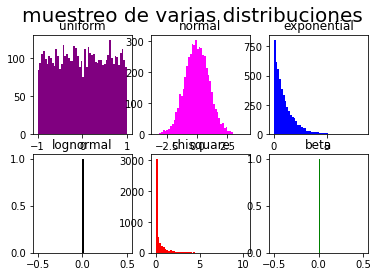

In [21]:
from matplotlib.pyplot import subplot


for dist, plt_ind, param,colors in zip(dis_list, plt_ind_list, param_list, color_list):
    x = eval('rand.' + dist +'('+ param + ',5000)')
    plt.subplot(plt_ind)
    plt.hist(x, bins=50, color=colors)
    plt.title(dist)
    
fig.subplots_adjust(hspace=0.4, wspace=.3)
plt.suptitle('muestreo de varias distribuciones ', fontsize=20)
plt.show()